In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from bdshare import get_basic_hist_data
import yfinance as yf
import datetime
plt.style .use('fivethirtyeight')

In [2]:
ticker='Ko'
df=yf.download(ticker,start='2012-01-01')
df.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2715 entries, 2012-01-03 to 2022-10-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2715 non-null   float64
 1   High       2715 non-null   float64
 2   Low        2715 non-null   float64
 3   Close      2715 non-null   float64
 4   Adj Close  2715 non-null   float64
 5   Volume     2715 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 148.5 KB


In [3]:
df['adj']=(df.Open+df.Close)/2
df

,Open,High,Low,Close,Adj Close,Volume,adj
Date,,,,,,,
2012-01-03,35.075001,35.355000,35.049999,35.070000,25.078640,15639600,35.072500
2012-01-04,34.955002,35.035000,34.750000,34.849998,24.921314,14239200,34.902500
2012-01-05,34.880001,34.935001,34.674999,34.685001,24.803320,14287600,34.782501
2012-01-06,34.735001,34.814999,34.310001,34.465000,24.646002,13646600,34.600000
2012-01-09,34.500000,34.584999,34.400002,34.465000,24.646002,10522600,34.482500
...,...,...,...,...,...,...,...
2022-10-10,54.599998,54.959999,54.020000,54.389999,54.389999,10239100,54.494999
2022-10-11,54.459999,55.220001,54.240002,54.480000,54.480000,14303900,54.469999
2022-10-12,55.230000,56.040001,55.040001,55.139999,55.139999,18377400,55.184999


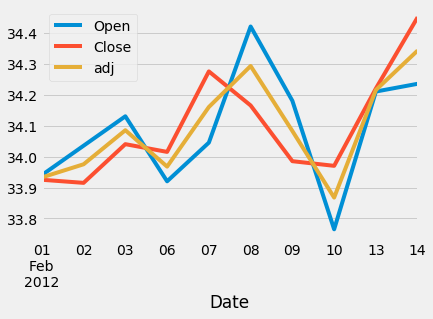

In [4]:
df[['Open','Close','adj']][20:30].plot()

In [5]:
df[1:12]

,Open,High,Low,Close,Adj Close,Volume,adj
Date,,,,,,,
2012-01-04,34.955002,35.035000,34.750000,34.849998,24.921314,14239200,34.902500
2012-01-05,34.880001,34.935001,34.674999,34.685001,24.803320,14287600,34.782501
2012-01-06,34.735001,34.814999,34.310001,34.465000,24.646002,13646600,34.600000
2012-01-09,34.500000,34.584999,34.400002,34.465000,24.646002,10522600,34.482500
2012-01-10,34.735001,34.759998,34.555000,34.669998,24.792591,12964400,34.702499
2012-01-11,34.185001,34.384998,33.775002,34.029999,24.334927,23428800,34.107500
2012-01-12,34.209999,34.250000,33.674999,33.785000,24.159733,15237000,33.997499
2012-01-13,33.669998,33.715000,33.285000,33.494999,23.952349,19991800,33.582499
2012-01-17,33.869999,33.939999,33.660000,33.674999,24.081062,15577000,33.772499


In [6]:
#df=df.interpolate(method='time')
df[1:12]

,Open,High,Low,Close,Adj Close,Volume,adj
Date,,,,,,,
2012-01-04,34.955002,35.035000,34.750000,34.849998,24.921314,14239200,34.902500
2012-01-05,34.880001,34.935001,34.674999,34.685001,24.803320,14287600,34.782501
2012-01-06,34.735001,34.814999,34.310001,34.465000,24.646002,13646600,34.600000
2012-01-09,34.500000,34.584999,34.400002,34.465000,24.646002,10522600,34.482500
2012-01-10,34.735001,34.759998,34.555000,34.669998,24.792591,12964400,34.702499
2012-01-11,34.185001,34.384998,33.775002,34.029999,24.334927,23428800,34.107500
2012-01-12,34.209999,34.250000,33.674999,33.785000,24.159733,15237000,33.997499
2012-01-13,33.669998,33.715000,33.285000,33.494999,23.952349,19991800,33.582499
2012-01-17,33.869999,33.939999,33.660000,33.674999,24.081062,15577000,33.772499


In [7]:
stl=STL(df['adj'],period=40)#two month seasonal Decomposition
Result_40 = stl.fit()
stl=STL(df['adj'],period=14)#two month seasonal Decomposition
Result_7 = stl.fit()

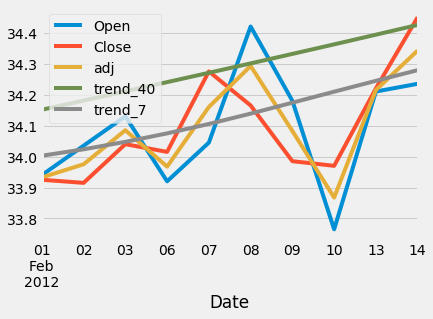

In [8]:
seasonal_40,trend_40,resid_40 = Result_40.seasonal,Result_40.trend, Result_40.resid
seasonal_7,trend_7,resid_7 = Result_7.seasonal,Result_7.trend, Result_7.resid

df['trend_40']=trend_40
df['trend_7']=trend_7
df['PCT_trend_40']=df.trend_40.pct_change()
df['PCT_trend_7']=df.trend_7.pct_change()
df[['Open','Close','adj','trend_40','trend_7']][20:30].plot()

In [9]:
df['PCT_trend_40']

Date
2012-01-03         NaN
2012-01-04    0.000799
2012-01-05    0.000803
2012-01-06    0.000806
2012-01-09    0.000810
                ...   
2022-10-10   -0.002989
2022-10-11   -0.003011
2022-10-12   -0.003033
2022-10-13   -0.003055
2022-10-14   -0.003076
Name: PCT_trend_40, Length: 2715, dtype: float64

In [10]:
anomalies_Sell=df[(df.PCT_trend_40>=df[df['PCT_trend_40']<0]['PCT_trend_40'].min())&(df.trend_7>df.trend_40)&(df.trend_7<df.adj)&(df.PCT_trend_7>=0)]
anomalies_Buy=df[(df.PCT_trend_40>=df[df['PCT_trend_40']<0]['PCT_trend_40'].min())&(df.trend_7<df.trend_40)&(df.trend_7>df.adj)&(df.PCT_trend_7>=0)]
anomalies_Buy

,Open,High,Low,Close,Adj Close,Volume,adj,trend_40,trend_7,PCT_trend_40,PCT_trend_7
Date,,,,,,,,,,,
2012-01-27,33.955002,34.070000,33.615002,33.720001,24.113243,16825000,33.837502,34.063355,33.958893,0.000851,0.000202
2012-01-30,33.645000,33.785000,33.514999,33.730000,24.120399,10591600,33.687500,34.092461,33.970269,0.000854,0.000335
2012-01-31,33.990002,33.990002,33.590000,33.764999,24.145428,13543400,33.877501,34.121714,33.984945,0.000858,0.000432
2012-02-01,33.939999,34.169998,33.900002,33.924999,24.259840,14915000,33.932499,34.151121,34.002557,0.000862,0.000518
2012-02-02,34.035000,34.119999,33.875000,33.915001,24.252701,13150000,33.975000,34.180692,34.023387,0.000866,0.000613
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-23,61.299999,61.910000,61.230000,61.880001,61.432110,17190900,61.590000,62.441804,61.659704,-0.000261,0.001842
2022-07-20,62.400002,62.580002,61.150002,61.500000,61.054863,11010500,61.950001,62.860403,62.524309,0.000647,0.000258
2022-07-21,61.259998,61.880001,60.790001,61.360001,60.915874,11959600,61.309999,62.899554,62.562756,0.000623,0.000615


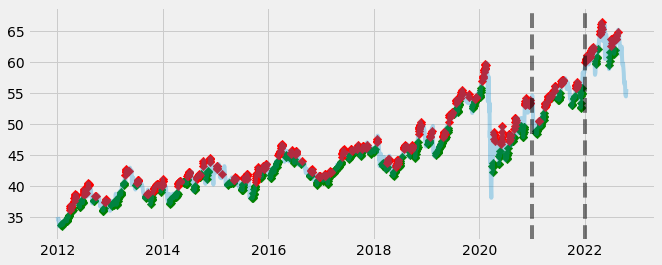

In [11]:
plt.figure(figsize=(10,4))
plt.plot(np.array(df.index),df['adj'].values,alpha=0.3)
for year in range(2020,2022):
    plt.axvline(pd.to_datetime(str(year)+'-12-31'), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(np.array(anomalies_Buy.index),anomalies_Buy['adj'].values, color='g', marker='D')
plt.scatter(np.array(anomalies_Sell.index),anomalies_Sell['adj'].values, color='R', marker='D')


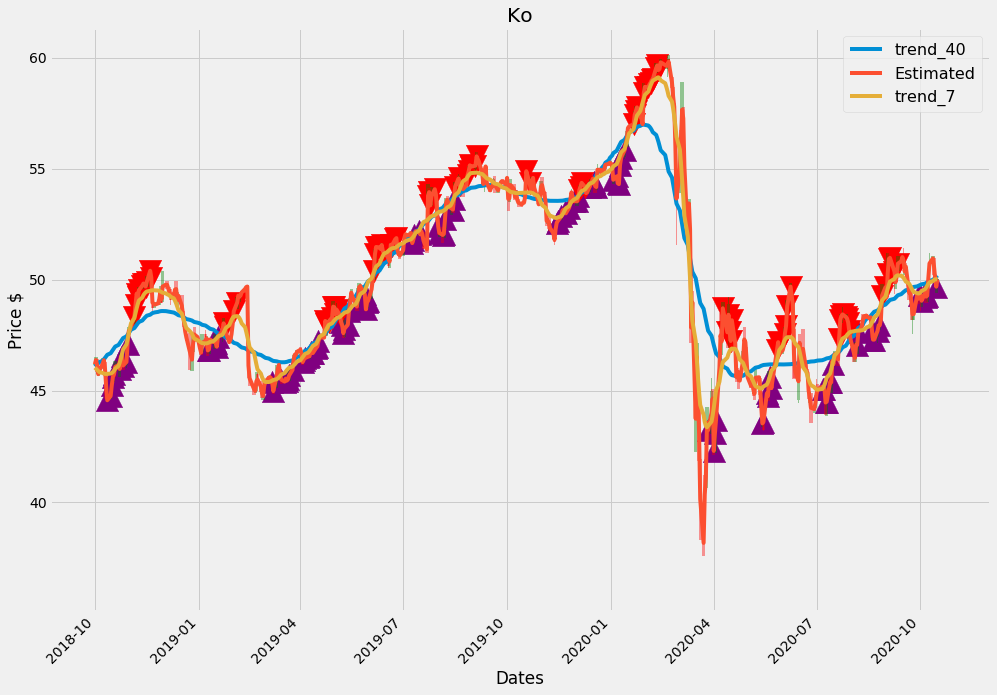

In [16]:
#create figure
x='2018-10-1'
y='2020-10-16'
plt.figure(figsize=(15,10))
df1=df.sort_index().loc[x:y]
anomalies_Buy1=anomalies_Buy.sort_index().loc[x:y]
anomalies_Sell1=anomalies_Sell.sort_index().loc[x:y]

#define width of candlestick elements
width = 3
width2 = 0.1

#define up and down prices
up = df1[df1.Close>=df1.Open]
down = df1[df1.Close<df1.Open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1,alpha=0.4)
plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1,alpha=0.4)
plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1,alpha=0.4)

#plot down prices
plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2,alpha=0.4)
plt.bar(down.index,down.High-down.Close,width2,bottom=down.Close,color=col2,alpha=0.4)
plt.bar(down.index,down.Low-down.Open,width2,bottom=down.Open,color=col2,alpha=0.4)

#
plt.plot(np.array(df1.index),df1.trend_40.values,label='trend_40')
plt.plot(np.array(df1.index),df1.adj.values,label='Estimated')
plt.plot(np.array(df1.index),df1.trend_7.values,label='trend_7')
#plt.plot(df1.First_dip_2, color='k', linestyle='--', alpha=0.2,label='Second Dip M2')

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')
plt.scatter(np.array(anomalies_Buy1.index),anomalies_Buy1['adj'].values, color='purple', marker='^',s=500)
plt.scatter(np.array(anomalies_Sell1.index),anomalies_Sell1['adj'].values, color='R', marker='v',s=500)
#display candlestick chart
plt.title(ticker)
plt.xlabel('Dates')
plt.ylabel('Price $')
plt.legend(fontsize=16)
plt.show()

In [13]:
df['PCT_trend_7'].median()

0.0004693578353955896

In [14]:
-0.004362*-0.004362

1.9027044000000003e-05

In [15]:
df[df['PCT_trend_40']<0]['PCT_trend_40'].min()

-0.0059667804254728285